In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.constants import R_earth, R_sun

import tynt
from synphot.spectrum import SpectralElement, SourceSpectrum
from synphot.observation import Observation
from synphot import BlackBody1D
from synphot.models import Empirical1D

# Parameters for AMXP Swift J1749.4-2807
distance = 6.7 * u.kpc 
T_eff = 5040 * u.K
stellar_radius = 0.8 * R_earth

# Keck props:
aperture_radius = 8 / 2 * u.m  # radius of 3.5m ARC telescope at APO
gain = 1.9  # the gain of this detector in e-/ADU
band = '2MASS/2MASS.J' # CHEOPS bp is approx Gaia G

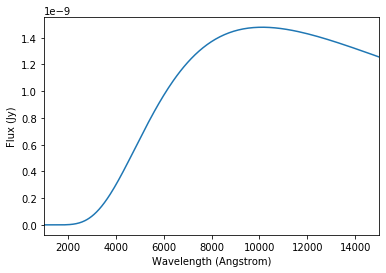

In [33]:
photlam = SourceSpectrum(BlackBody1D, temperature=T_eff)

# Scale the flux to get the value at Earth
photlam = photlam * float(stellar_radius / distance) ** 2

photlam.plot(flux_unit='Jy', left=1000, right=15000)

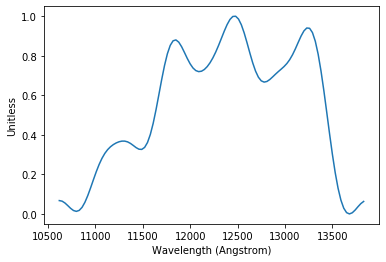

In [34]:
f = tynt.FilterGenerator()

filt = f.reconstruct(band)
bp = SpectralElement(Empirical1D,
                     points=filt.wavelength,
                     lookup_table=filt.transmittance)
bp.plot()

In [35]:
# quantum_efficiency = SpectralElement.from_file('../aspros/aspros/data/ccd_QE.csv', wave_unit="nm")
# quantum_efficiency = quantum_efficiency / 100  # convert percentages to decimals

# quantum_efficiency.plot(left=3000, right=14000)

In [37]:
observation = Observation(photlam, bp)# * quantum_efficiency)
aperture_area = np.pi * aperture_radius ** 2
countrate = observation.countrate(area=aperture_area) / gain

counts_per_eclipse = countrate * 30 * 60 * u.s

In [43]:
"{0:.1f} ± {1:.1f}".format(counts_per_eclipse.value, np.sqrt(counts_per_eclipse.value))

'142.5 ± 11.9'

Text(0, 0.5, 'Counts')

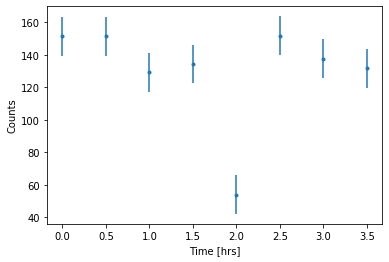

In [67]:
times = np.arange(0, 4, 0.5)
fluxes = counts_per_eclipse.value * np.ones_like(times)

fluxes += np.sqrt(counts_per_eclipse.value) * np.random.randn(len(times))

rprs2 = (0.8)**2

fluxes[len(times)//2] *= (1 - rprs2)

plt.errorbar(times, fluxes, np.sqrt(counts_per_eclipse.value), fmt='.')
plt.xlabel('Time [hrs]')
plt.ylabel('Counts')